In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MSE

# 数据集

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X = data
y = boston.target

In [8]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=29)

In [9]:
print(Xtrain.shape)
print(Xtest.shape)

(354, 13)
(152, 13)


-----

XGBoost的两种接口

# xgb接口

In [10]:
import xgboost as xgb

In [11]:
dtrain = xgb.DMatrix(Xtrain, ytrain)
dtest = xgb.DMatrix(Xtest,ytest)

## 配置参数  
下面的参数都是默认值，只不过显式写出来了

In [12]:
# 这个params字段里配置的是 Booster 类的参数
params = {'booster':'gbtree',  #基分类器
          'objective': 'reg:squarederror', #目标函数
         'eta': 0.3,  #学习速率
         'gamma': 0,  #分咧的最小增益
         'max_depth': 6,  #树的最大深度
         'lambda': 1,  #L2正则项系数
         'alpha': 0,  # L1正则项系数
         'subsample': 1,  #boostrap是的采样比例
         'tree': 'auto',  # 树的生成方式
         'base_score': 0.5,  # 生成第一棵树时的初始值
         'eval_metric': ['rmse','mae']}  # 在 验证集 上进行评估的指标，可以选择多个

# booster的个数
num_round = 10

# 用于训练时查看验证集上效果的 evals (list of pairs (DMatrix, string)) 
watch_list = [(dtrain, 'train'), (dtest, 'eval')]

## 训练模型  
`params`里设置的`eval_metric`参数会配合`watch_list`参数使用，会显示`num_round`行记录，每行有$eval\_metric*watch\_list$的记录 

In [13]:
bst = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_round
                , evals=watch_list
               )

[0]	train-rmse:17.0962	train-mae:15.5753	eval-rmse:17.0354	eval-mae:15.4794
[1]	train-rmse:12.3508	train-mae:11.0463	eval-rmse:12.3715	eval-mae:10.9618
[2]	train-rmse:8.97849	train-mae:7.8587	eval-rmse:9.14436	eval-mae:7.82454
[3]	train-rmse:6.59204	train-mae:5.60841	eval-rmse:7.02082	eval-mae:5.72816
[4]	train-rmse:4.90564	train-mae:4.04055	eval-rmse:5.58317	eval-mae:4.32838
[5]	train-rmse:3.71914	train-mae:2.9316	eval-rmse:4.7071	eval-mae:3.47626
[6]	train-rmse:2.88353	train-mae:2.20503	eval-rmse:4.21405	eval-mae:3.0341
[7]	train-rmse:2.286	train-mae:1.71135	eval-rmse:3.85263	eval-mae:2.74129
[8]	train-rmse:1.90478	train-mae:1.41127	eval-rmse:3.65708	eval-mae:2.5822
[9]	train-rmse:1.6064	train-mae:1.19197	eval-rmse:3.55004	eval-mae:2.48576


## 绘制特征重要性  
`xgboost.plot_importance(booster, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance', xlabel='F score', ylabel='Features', fmap='', importance_type='weight', max_num_features=None, grid=True, show_values=True, **kwargs)`  

 + importance_type (str, default "weight")
 How the importance is calculated: either “weight”, “gain”, or “cover”
   + ”weight” is the number of times a feature appears in a tree —— 特征在树中出现的次数
   + ”gain” is the average gain of splits which use the feature —— 使用该特征进行分割时的平均gain
   + ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

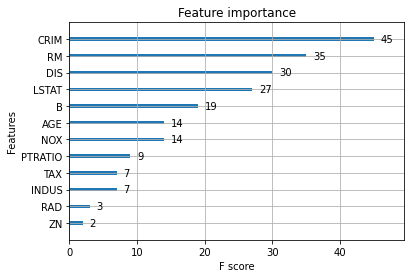

In [14]:
xgb.plot_importance(booster=bst, importance_type='weight')

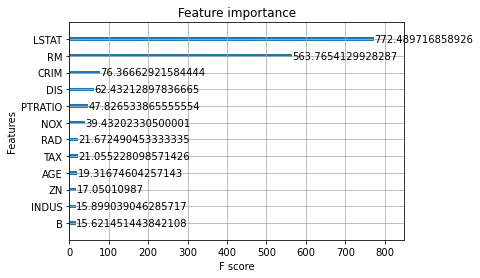

In [15]:
xgb.plot_importance(booster=bst, importance_type='gain')

+ 绘制树  
`xgboost.plot_tree(booster, fmap='', num_trees=0, rankdir=None, ax=None, **kwargs)`  
`xgboost.to_graphviz(booster, fmap='', num_trees=0, rankdir=None, yes_color=None, no_color=None, condition_node_params=None, leaf_node_params=None, **kwargs)`

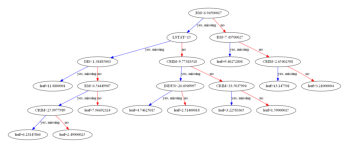

In [16]:
xgb.plot_tree(booster=bst, num_trees=0)

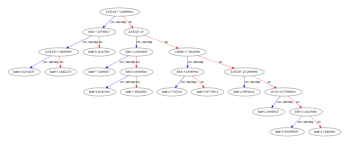

In [17]:
xgb.plot_tree(booster=bst, num_trees=1)

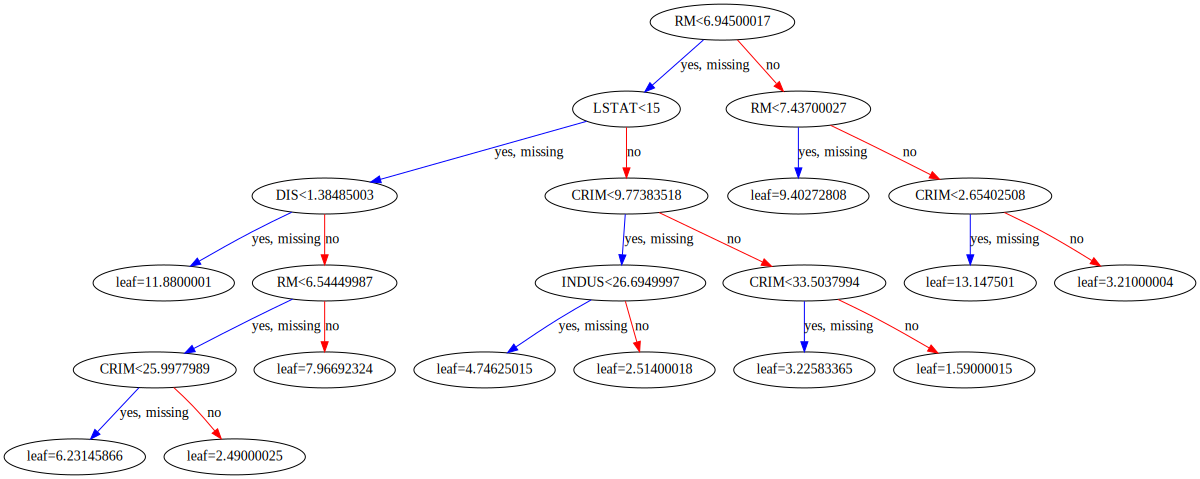

In [18]:
xgb.to_graphviz(booster=bst,num_trees=0)

## 查看训练之后的模型的各个参数

In [19]:
bst.attributes()

{}

In [20]:
bst.get_fscore()

{'RM': 35,
 'LSTAT': 27,
 'DIS': 30,
 'CRIM': 45,
 'INDUS': 7,
 'NOX': 14,
 'RAD': 3,
 'AGE': 14,
 'PTRATIO': 9,
 'B': 19,
 'ZN': 2,
 'TAX': 7}

In [21]:
bst.get_score(importance_type='weight')

{'RM': 35,
 'LSTAT': 27,
 'DIS': 30,
 'CRIM': 45,
 'INDUS': 7,
 'NOX': 14,
 'RAD': 3,
 'AGE': 14,
 'PTRATIO': 9,
 'B': 19,
 'ZN': 2,
 'TAX': 7}

In [22]:
bst.get_score(importance_type='gain')

{'RM': 563.7654129928287,
 'LSTAT': 772.489716858926,
 'DIS': 62.43212897836665,
 'CRIM': 76.36662921584444,
 'INDUS': 15.899039046285717,
 'NOX': 39.43202330500001,
 'RAD': 21.672490453333335,
 'AGE': 19.31674604257143,
 'PTRATIO': 47.826533865555554,
 'B': 15.621451443842108,
 'ZN': 17.05010987,
 'TAX': 21.055228098571426}

## 预测结果

In [23]:
ytrain_predict = bst.predict(dtrain)
ytest_predict = bst.predict(dtest)
print(ytrain_predict.shape)
print(ytest_predict.shape)

(354,)
(152,)


In [24]:
# 下面这结果应该和上面模型训练时输出的最后一个结果一致
print(  MSE(ytrain, ytrain_predict)**(1/2)   )
print(  MSE(ytest, ytest_predict)**(1/2)  )

1.606395814779231
3.550040035845486


## 交叉验证  
`xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)`

In [45]:
# 这个params字段里配置的是 Booster 类的参数
params = {'booster':'gbtree',  #基分类器
          'objective': 'reg:squarederror', #目标函数
         'eta': 0.3,  #学习速率
         'gamma': 0,  #分咧的最小增益
         'max_depth': 6,  #树的最大深度
         'lambda': 1,  #L2正则项系数
         'alpha': 0,  # L1正则项系数
         'subsample': 1,  #boostrap是的采样比例
         'tree': 'auto',  # 树的生成方式
         'base_score': 0.5,  # 生成第一棵树时的初始值
         'eval_metric': ['rmse']}  # 在 验证集 上进行评估的指标，可以选择多个

# booster的个数
num_round = 10

# 交叉验证的折数
n_fold = 5

In [46]:
history = xgb.cv(params=params, dtrain=dtrain, num_boost_round=num_round, nfold=n_fold)

XGB里的CV函数（默认）返回的是一个DF，行数=树的个数`num_boost_round`，列数=`eval_metric`的长度*2，第一个在nfold上的误差均值，第二个是标准差

In [47]:
history

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.153311,0.071318,17.266638,0.451084
1,12.423677,0.061084,12.698785,0.441580
2,9.071639,0.034572,9.469164,0.411159
3,6.712857,0.030572,7.393498,0.363906
4,5.013966,0.025305,5.953139,0.340723
5,3.822156,0.043644,5.159067,0.370705
6,2.967681,0.041042,4.591992,0.382552
7,2.365122,0.041977,4.252029,0.393327
8,1.923012,0.044469,4.072341,0.445608
9,1.609181,0.071512,3.959653,0.461702


+ 使用交叉验证来寻找最优的超参数`n_estimator`  
这个不太一样，因为XGB的CV会返回每一轮的树的CV结果，所以只需要把n_estimator设置的足够大，然后在结果里找mean里较小的，或者变化不太明显的n_estimator就可以了。

In [48]:
history = xgb.cv(params=params, dtrain=dtrain, num_boost_round=150, nfold=n_fold)

In [51]:
history.shape

(150, 4)

In [55]:
history['num_round'] = np.arange(1,151)

In [56]:
history.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std,num_round
0,17.153311,0.071318,17.266638,0.451084,1
1,12.423677,0.061084,12.698786,0.441580,2
2,9.071639,0.034572,9.469164,0.411159,3
3,6.712857,0.030572,7.393498,0.363906,4
4,5.013966,0.025305,5.953139,0.340723,5


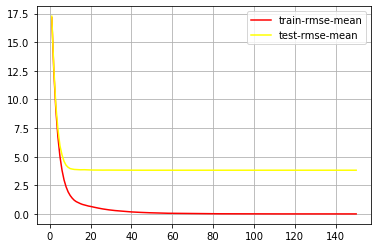

In [64]:
# plt.figure(figsize=(20,30))
plt.figure()
plt.grid()
plt.plot(history['num_round'], history['train-rmse-mean'], c='red', label='train-rmse-mean')
plt.plot(history['num_round'], history['test-rmse-mean'], c='yellow', label = 'test-rmse-mean')
plt.legend()
plt.show()

上面的history是wide格式，使用seaborn和plotly绘图时不方面，所以需要转成长格式

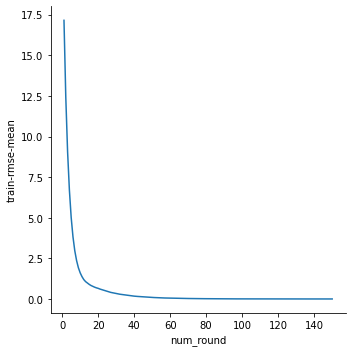

In [61]:
sns.relplot(data=history, x ='num_round', y='train-rmse-mean', kind='line' )

____________

# Sklearn接口

In [42]:
# xgboost库里的参数配置
# 这个params字段里配置的是 Booster 类的参数
params = {'booster':'gbtree',  #基分类器
          'objective': 'reg:squarederror', #目标函数
         'eta': 0.3,  #学习速率
         'gamma': 0,  #分咧的最小增益
         'max_depth': 6,  #树的最大深度
         'lambda': 1,  #L2正则项系数
         'alpha': 0,  # L1正则项系数
         'subsample': 1,  #boostrap是的采样比例
         'tree': 'auto',  # 树的生成方式
         'base_score': 0.5,  # 生成第一棵树时的初始值
         'eval_metric': ['rmse','mae']}  # 在 验证集 上进行评估的指标，可以选择多个

# booster的个数
num_round = 10

# 用于训练时查看验证集上效果的 evals (list of pairs (DMatrix, string)) 
watch_list = [(dtrain, 'train'), (dtest, 'eval')]

In [57]:
from xgboost import XGBRegressor as XGBR

In [58]:
# sklearn接口不能使用字典的形式配置参数
xgbr = XGBR(
    booster = 'gbtree',
    objective='reg:squarederror',
    n_estimators = 10, #相当于num_booster_round
    max_depth = 6,
    learning_rate = 0.3, # 学习速率
    tree_method = 'auto',
    gammar = 0,
    reg_alpah= 0, # L1正则化参数
    reg_lambda= 1, # L2正则化参数
    subsample= 1,
    base_score= 0.5
)

In [59]:
xgbr.fit(X=Xtrain,y=ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gammar=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpah=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             tree_method='auto', verbosity=1)

In [73]:
# 也可以传入验证集
xgbr.fit(X=Xtrain,y=ytrain, eval_set=[(Xtest, ytest)], eval_metric=['mae','rmse'])

[0]	validation_0-mae:15.4794	validation_0-rmse:17.0354
[1]	validation_0-mae:10.9618	validation_0-rmse:12.3715
[2]	validation_0-mae:7.82454	validation_0-rmse:9.14436
[3]	validation_0-mae:5.72816	validation_0-rmse:7.02082
[4]	validation_0-mae:4.32838	validation_0-rmse:5.58317
[5]	validation_0-mae:3.47626	validation_0-rmse:4.7071
[6]	validation_0-mae:3.0341	validation_0-rmse:4.21405
[7]	validation_0-mae:2.74129	validation_0-rmse:3.85263
[8]	validation_0-mae:2.5822	validation_0-rmse:3.65708
[9]	validation_0-mae:2.48576	validation_0-rmse:3.55004


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gammar=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpah=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             tree_method='auto', verbosity=1)

In [74]:
xgbr.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 10,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:squarederror',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'tree_method': 'auto',
 'gammar': 0,
 'reg_alpah': 0}

In [75]:
xgbr.get_xgb_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 10,
 'nthread': 1,
 'objective': 'reg:squarederror',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 1,
 'verbosity': 1,
 'tree_method': 'auto',
 'gammar': 0,
 'reg_alpah': 0}

In [76]:
xgbr.get_booster()

In [77]:
xgbr.get_num_boosting_rounds()

10

In [78]:
xgbr.feature_importances_

array([0.0456485 , 0.01019178, 0.00950372, 0.        , 0.02357067,
       0.33699337, 0.01154667, 0.03731909, 0.01295483, 0.01258586,
       0.02858853, 0.00933779, 0.46175924], dtype=float32)

In [79]:
# 这里默认返回的是R^2，不是MSE，可使用shift + tab查看签名
xgbr.score(Xtest,ytest)

0.841814503167488

In [83]:
y_predict = xgbr.predict(Xtest)

In [84]:
from sklearn.metrics import r2_score

In [85]:
r2_score(y_true=ytest, y_pred=ytest_predict)

0.8418145028374874

交叉验证效果

In [80]:
xgbr = XGBR(n_estimators=100)
cross_val_score(xgbr,X,y,cv=5)

[13:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.77955736, 0.85656904, 0.79106707, 0.57326677, 0.41285553])

In [81]:
# 查看sklearn中已有的指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [82]:
# 使用其他指标
cross_val_score(xgbr,X,y,cv=5,scoring='neg_mean_squared_error')

[13:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([ -7.61302966, -13.05748854, -16.73285435, -37.42956222,
       -15.6111833 ])

_________

# 对比随机森林和线性回归

In [89]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

In [101]:
# 线性回归
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
lr.score(Xtest,ytest)

0.7769540740816125

In [102]:
# 随机森林
rf = RFR(n_estimators=20)
rf.fit(Xtrain,ytrain)
rf.score(Xtest,ytest)

0.8398599894467208

In [103]:
# XGBoost
xgbr = XGBR(
    booster = 'gbtree',
    objective='reg:squarederror',
    n_estimators = 10, #相当于num_booster_round
    max_depth = 6,
    learning_rate = 0.3, # 学习速率
    tree_method = 'auto',
    gammar = 0,
    reg_alpah= 0, # L1正则化参数
    reg_lambda= 1, # L2正则化参数
    subsample= 1,
    base_score= 0.5
)
xgbr.fit(X=Xtrain,y=ytrain)
xgbr.score(Xtest, ytest)

0.841814503167488

In [107]:
- cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')

array([12.46030057, 26.04862111, 33.07413798, 80.76237112, 33.31360656])

In [106]:
- cross_val_score(rf,X,y,cv=5, scoring='neg_mean_squared_error')

array([ 8.01978039, 15.5468948 , 18.35381386, 43.13013738, 18.37307847])

In [108]:
- cross_val_score(xgbr,X,y,cv=5, scoring='neg_mean_squared_error')

array([ 8.5341622 , 16.5285442 , 20.92416823, 46.39984535, 17.47468213])

-------------

# XGBoost的调参

优先调整的参数  
+ `n_estimator`或者`num_boost_round`，一般在300以下
+ `gammar`，进行分支时的最小增益
+ `max_depth`，这个参数和上面的`gammar`通常选择一个进行调整就可以了
+ `colsample_bytree`，默认为1，列采样（每次生成树时随机抽样特征）的比例
+ `colsample_bylevel`，默认为1，每次生成**树的一层**时 随机抽样特征的比例
+ `colsample_bynode`，默认为1，每次生成**一个叶子节点**时 随机抽样特征的比例

通常不调整的参数  
+ 学习速率`eta`或者`learning_rate`，这个参数对于模型的收敛速度影响较大，但是通常**不调整这个**，即使调整，它的值也在$[0.01, 0.2]$之间变动
+ 采样比例`subsample`，默认为1，通常也不调整，只有在样本数据量非常大的时候才进行调整
+ 正则化参数 L1的`alpha`或者`reg_alpha`，L2的`lambda`或者`reg_lambda`，如果要调整，通常优先选择调整L2正则参数

观察n_estimator的学习曲线

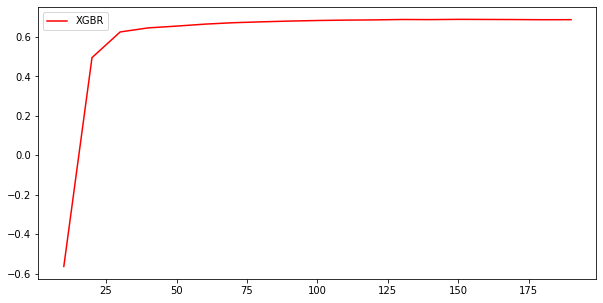

In [89]:
n_estimator_range = range(10, 200, 10)
score = []
for n_estimator in n_estimator_range:
    xgbr = XGBR(n_estimators=n_estimator, silent=True)
    result = cross_val_score(xgbr, X, y, cv=5).mean()
    score.append(result)
    
plt.figure(figsize=(10,5))
plt.plot(n_estimator_range, score, c='red', label='XGBR')
plt.legend()

In [90]:
print(n_estimator_range[score.index(max(score))], max(score))

150 0.6885265739694534


重新绘制带方差和偏差的学习曲线

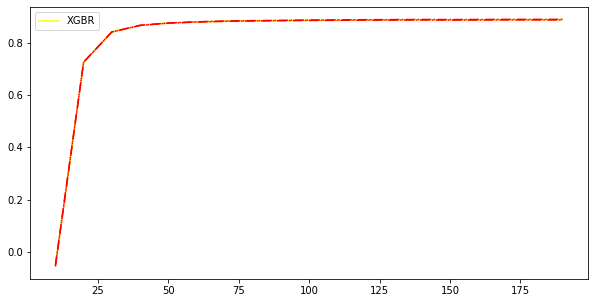

In [91]:
n_estimator_range = range(10, 200, 10)
cv = KFold(n_splits=5, shuffle=True, random_state=29)
score = []
var = []
ge = []

for n_estimator in n_estimator_range:
    xgbr = XGBR(n_estimators=n_estimator, silent=True)
    cv_result = cross_val_score(xgbr, X, y, cv=cv)
    score.append(cv_result.mean())
    var.append(cv_result.var())
    ge.append((1 - cv_result.mean())**2 + cv_result.var())

score = np.array(score)
var = np.array(var)

plt.figure(figsize=(10,5))
plt.plot(n_estimator_range, score, c='yellow', label='XGBR')
# 添加方差线
plt.plot(n_estimator_range, score-var, c='red', linestyle='-.')
plt.plot(n_estimator_range, score+var, c='red', linestyle='-.')
plt.legend()

调整增益参数$\gamma$
需要使用xgboost本身库里的xgboost.cv来查看效果

In [92]:
import xgboost as XGB

from time import time
from datetime import datetime

首先练习使用xgboost.cv()函数

In [93]:
data = XGB.DMatrix(X,y)
param = {'silent':True, 'obj':'reg:linear', 'gamma':0}
num_round = 180
n_fold = 5

In [94]:
time0 = time()
cv_result = XGB.cv(params=param, dtrain=data, num_boost_round=num_round, nfold=n_fold)
time_diff = time() - time0
print("running time : " + datetime.fromtimestamp(time_diff).strftime('%M:%S:%f'))

running time : 00:00:679215


In [95]:
type(cv_result)

pandas.core.frame.DataFrame

In [96]:
cv_result.__class__

pandas.core.frame.DataFrame

In [97]:
cv_result

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105577,0.129117,17.163215,0.584297
1,12.337972,0.097556,12.519736,0.473458
2,8.994071,0.065756,9.404534,0.472310
3,6.629480,0.050323,7.250335,0.500342
4,4.954407,0.033209,5.920812,0.591874
...,...,...,...,...
175,0.001299,0.000289,3.669898,0.857676
176,0.001285,0.000261,3.669897,0.857677
177,0.001275,0.000239,3.669903,0.857669
178,0.001263,0.000217,3.669901,0.857672


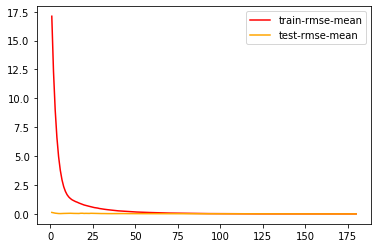

In [98]:
plt.plot(range(1, 181), cv_result.iloc[:,0], c='red', label="train-rmse-mean")
plt.plot(range(1,181), cv_result.iloc[:,1], c='orange', label='test-rmse-mean')
plt.legend()

使用xgboost.cv来调整$\gamma$

In [99]:
num_round = 180
n_fold = 5
param1 = {'silent':True, 'obj':'reg:linear', 'gamma':0}
param2 = {'silent':True, 'obj':'reg:linear', 'gamma':20}

cv_result1 = XGB.cv(params=param1, dtrain=data, num_boost_round=num_round, nfold=n_fold)
cv_result2 = XGB.cv(params=param2, dtrain=data, num_boost_round=num_round, nfold=n_fold)

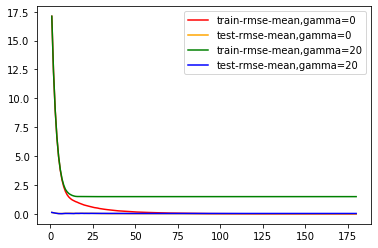

In [100]:
plt.plot(range(1, 181),cv_result1.iloc[:,0], c='red', label="train-rmse-mean,gamma=0")
plt.plot(range(1,181), cv_result1.iloc[:,1], c='orange', label='test-rmse-mean,gamma=0')
plt.plot(range(1,181), cv_result2.iloc[:,0], c='green', label="train-rmse-mean,gamma=20")
plt.plot(range(1,181), cv_result2.iloc[:,1], c='blue', label='test-rmse-mean,gamma=20')
plt.legend()

______

# 样本不均衡问题